# 频谱分析

将时域信号变换至频域加以分析的方法称为频谱分析。频谱分析的目的是把复杂的时间历程波形，经过傅里叶变换分解为若干单一的谐波分量来研究，以获得信号的频率结构以及各谐波和相位信息。
对信号进行频谱分析可以获得更多有用信息，如求得动态信号中的各个频率成分和频率分布范围，求出各个频率成分的幅值分布和能量分布，从而得到主要幅度和能量分布的频率值。
由时间函数求频谱函数的傅里叶变换公式就是将该时间函数乘以以频率为系数的指数函数之后，在从负无限大到正无限大的整个区间内，对时间进行积分，这样就得到了与这个时间函数对应的，以频率为自变量的频谱函数。频谱函数是信号的频域表示方式。根据上述傅里叶变换公式，可以求出常数（直流信号）的频谱函数为频域中位于零频率处的一个冲激函数，表示直流信号就是一个频率等于零的信号。与此相反，冲激函数的频谱函数等于常数，表示冲激函数含有无限多个、频率无限密集的正弦成分。同样的，单个正弦波的频谱函数就是频域中位于该正弦波频率处的一对冲激函数。



## 傅里叶变换

傅里叶变换是信号处理的基础之一,它可以将函数在时域和频域间转换
np中用`np.fft`模块可以做傅里叶变换

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
%matplotlib inline

### 傅里叶级数

假设:关于一个变量的任意一个周期函数 $f(x)$ ，不论连续或不连续,且函数 $f(x)$ 必须平方可积的，则 $f(x)$ 都可以近似的展开为正弦函数的级数，而正弦函数的参数为变量的倍数,大约就是:

$$f(x)=\sum_k c_k sin kx$$

#### 最常见的表达形式

周期为T的函数f(x)有：

$$\begin{align}
f(x)&=a_0+\sum_{k=1}^\infty{[a_k sin (k{2\pi\over T}x)+b_k cos(k{2\pi\over T}x)]}\\
&=a_0+\sum_{k=1}^\infty{\sqrt{a_k^2+b_k^2} [sin(k{2\pi\over T}x+\theta)]}
\end{align}$$

然后因为有欧拉公式:

$$ cos x={ \frac {e^{ix}+e^{-ix}} 2} $$

$$ sin x={\frac {e^{ix}-e^{-ix}} 2i} $$

所以有:

$$ f(x) = \sum_{k=-\infty}^{+\infty}a_k e^{ik({2\pi\over T})t}$$


### 傅里叶变换:

假设一个函数（信号）是周期的，但是它的周期是无穷大,可以得出:

傅里叶正变换:

$$
F(\omega)=\int_{-\infty}^\infty f(t) e^{-i\omega t}dt
$$

傅里叶反变换:

$$
f(t)={1\over {2\pi}}\int_{-\infty}^\infty F(\omega) e^{-i\omega t}d\omega
$$

于是,我们可以利用傅里叶正变换变到分解状态（或者说频域），然后把它的分量分别处理，再利用反变换回去了.






#### 傅里叶变换的支持方法

实域变频域后,函数表现形式有了变化,各个分量有了频率,周期.

numpy中获取和处理频率的工具有

+ fftfreq(n[, d])
    获取连续傅里叶变换分量频率
    
+ rfftfreq(n[, d])
    获取离散傅里叶变换分量频率
    
+ fftshift(x[, axes])
    将0频分量移动到中心
+ ifftshift(x[, axes])	The inverse of fftshift.
     上一操作的反操作

### 离散时间信号

在时间上依次出现的数值序列,例如，{…，0.5，1，2，-1，0，5，…}。相邻两个数之间的时间间隔可以是相等的，也可以是不等的。在前一情况下，设时间间隔为T秒,则离散信号可用符号x(nT)来表示（图1）。在间隔T归一化为1的条件下,T可以省略,即将x(nT)表示为x(n)。x(n)既可表示整个序列, 也可表示离散信号在nT瞬间的值。

### 离散傅里叶变换

简称DFT,

python的numpy里的fft模块就是用的这种变换

对于N点序列 $\left\{x[n]\right\}_{0\le n <N}$，它的离散傅里叶变换（DFT）为:

$$\hat{x}[k]=\sum_{n=0}^{N-1} e^{-i\frac{2\pi}{N}nk}x[n] \qquad k = 0,1,\ldots,N-1.$$

其中i是虚数单位

其逆变换为:

$$x\left[n\right]={1 \over N}\sum_{k=0}^{N-1} e^{ i\frac{2\pi}{N}nk}\hat{x}[k] \qquad n = 0,1,\ldots,N-1.$$


#### 标准快速傅里叶变换:

numpy中实现了标准快速傅里叶变换

方法|说明
---|---
fft(a[, n, axis, norm])|	一维空间离散傅里叶变换
ifft(a[, n, axis, norm])|	一维空间离散傅里叶反变换
fft2(a[, s, axes, norm])|	二维空间离散傅里叶变换
ifft2(a[, s, axes, norm])|	二维空间离散傅里叶反变换
fftn(a[, s, axes, norm])|	N维空间离散傅里叶变换
ifftn(a[, s, axes, norm])|	N维空间离散傅里叶反变换

fft的参数是一个数组,这个数组可以理解为一个连续函数按一定周期采样的结果.而这个数组一般都是2的整数次幂.比如256,128,64这样

以下是标准傅里叶变换的例子

+ 一维空间

我们以一个矩形波为例子

In [5]:
t = np.linspace(-1, 1, 128,endpoint=True)
tz = list(map(lambda x: 1 if (x > -0.5 and x<0.5) else 0,t))

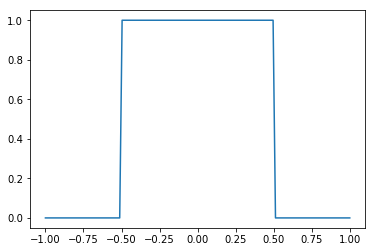

In [6]:
plt.plot(t,tz)
plt.show()

In [7]:
sp = np.fft.fft(tz)

In [8]:
re = np.fft.ifft(sp)#傅里叶逆变换

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


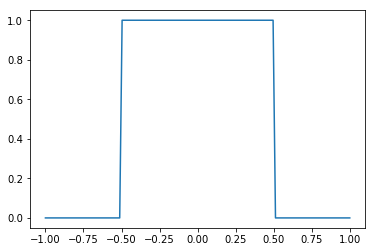

In [9]:
plt.plot(t,re)
plt.show()

In [10]:
freq = np.fft.fftfreq(t.shape[-1])#获取频率

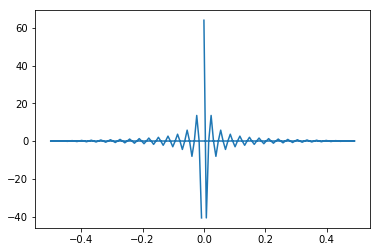

In [11]:
plt.plot(freq, sp.real)
plt.show()

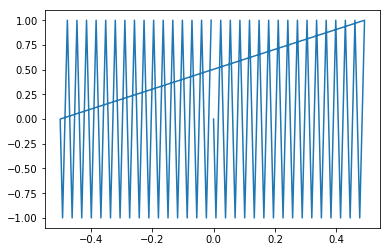

In [12]:
plt.plot(freq, sp.imag)
plt.show()

二维空间(常用图像处理)

In [13]:
a = np.mgrid[:5, :5][0]
a

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [14]:
np.fft.fft2(a)

array([[ 50.0 +0.j        ,   0.0 +0.j        ,   0.0 +0.j        ,
          0.0 +0.j        ,   0.0 +0.j        ],
       [-12.5+17.20477401j,   0.0 +0.j        ,   0.0 +0.j        ,
          0.0 +0.j        ,   0.0 +0.j        ],
       [-12.5 +4.0614962j ,   0.0 +0.j        ,   0.0 +0.j        ,
          0.0 +0.j        ,   0.0 +0.j        ],
       [-12.5 -4.0614962j ,   0.0 +0.j        ,   0.0 +0.j        ,
          0.0 +0.j        ,   0.0 +0.j        ],
       [-12.5-17.20477401j,   0.0 +0.j        ,   0.0 +0.j        ,
          0.0 +0.j        ,   0.0 +0.j        ]])

n维空间

In [15]:
b = np.mgrid[:3, :3, :3][0]
b

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]])

In [16]:
np.fft.fftn(b, axes=(1, 2))

array([[[  0.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j]],

       [[  9.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j]],

       [[ 18.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j]]])

In [17]:
np.fft.fftn(b, (2, 2), axes=(0, 1))

array([[[ 2.+0.j,  2.+0.j,  2.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]],

       [[-2.+0.j, -2.+0.j, -2.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]]])

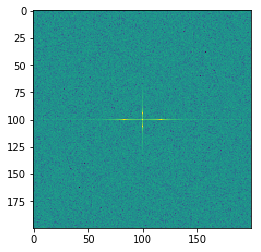

In [18]:
[X, Y] = np.meshgrid(2 * np.pi * np.arange(200) / 12,
                      2 * np.pi * np.arange(200) / 34)
S = np.sin(X) + np.cos(Y) + np.random.uniform(0, 1, X.shape)
FS = np.fft.fftn(S)
plt.imshow(np.log(np.abs(np.fft.fftshift(FS))**2))
plt.show()

numpy中其他的傅里叶变换还有


实数快速傅里叶变换:

方法|说明
---|---
rfft(a[, n, axis, norm])|	实数输入的一维空间离散傅里叶变换
irfft(a[, n, axis, norm])|	实数输入的一维空间离散傅里叶反变换
rfft2(a[, s, axes, norm])|	实数输入的二维空间离散傅里叶变换
irfft2(a[, s, axes, norm])|	实数输入的二维空间离散傅里叶反变换
rfftn(a[, s, axes, norm])|	实数输入的N维空间离散傅里叶变换
irfftn(a[, s, axes, norm])|	实数输入的N维空间离散傅里叶反变换


Hermitian傅里叶变换:

方法|说明
---|---
hfft(a[, n, axis, norm])|	计算实域中埃尔米特对称的信号的快速傅里叶变换
ihfft(a[, n, axis, norm])|	计算实域中埃尔米特对称的信号的快速傅里叶反变换

他们用法与上面的相同就不一一描述了

## 窗函数

在信号处理中，窗函数(window function)是一种除在给定区间之外取值均为0的实函数。譬如：在给定区间内为常数而在区间外为0的窗函数被形象地称为矩形窗。任何函数与窗函数之积仍为窗函数，所以相乘的结果就像透过窗口“看”其他函数一样。窗函数在频谱分析、滤波器设计、波束形成、以及音频数据压缩（如在Ogg Vorbis音频格式中）等方面有广泛的应用。

numpy中提供了几种常见的窗函数

函数|说明
---|---
bartlett(M)	|Bartlett窗口函数
blackman(M)	|Blackman 窗口函数
hamming(M)	|Hamming窗口函数
hanning(M)	|Hanning窗口函数
kaiser(M, beta)	|Kaiser窗口函数

### bartlett窗

$w(n)=\frac{2}{N-1}\cdot\left(\frac{N-1}{2}-\left |n-\frac{N-1}{2}\right |\right)\,$

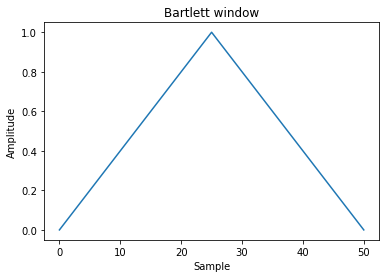

In [19]:
window = np.bartlett(51)
plt.plot(window)
plt.title("Bartlett window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Blackman窗

$$ 
w(n)=a_0 - a_1 \cos \left ( \frac{2 \pi n}{N-1} \right) + a_2 \cos \left ( \frac{4 \pi n}{N-1} \right)
$$
$$
{\displaystyle a_{0}=0.42;\quad a_{1}=0.5;\quad a_{2}=0.08\,} a_0=0.42;\quad a_1=0.5;\quad a_2=0.08\,
$$

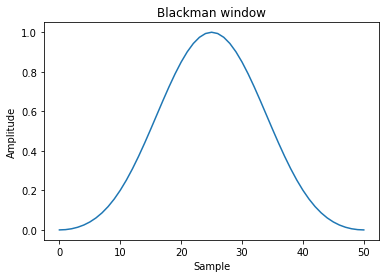

In [20]:
window = np.blackman(51)
plt.plot(window)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Hamming窗

$ w(n)=0.53836 - 0.46164\; \cos \left ( \frac{2 \pi n}{N-1} \right)$

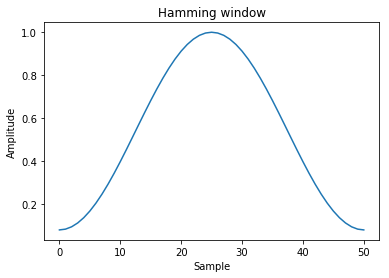

In [21]:
window = np.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Hanning窗

$w(n)= 0.5\; \left(1 - \cos \left ( \frac{2 \pi n}{N-1} \right) \right)$

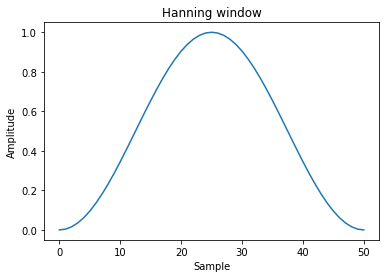

In [22]:
window = np.hanning(51)
plt.plot(window)
plt.title("Hanning window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Kaiser窗

$$ w(n)=\frac{I_0\Bigg (\pi\alpha \sqrt{1 - (\begin{matrix} \frac{2 n}{N-1} \end{matrix}-1)^2}\Bigg )} {I_0(\pi\alpha)}$$

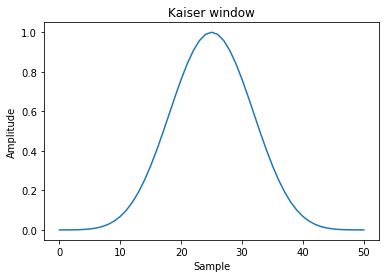

In [23]:
window = np.kaiser(51, 14)
plt.plot(window)
plt.title("Kaiser window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()